In [6]:
pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   --------------------------------------  245.8/250.9 kB 15.7 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

financial_train = pd.read_excel('financial_train.xlsx')
financial_train

,종목코드,총자산,총자본회전율,부채비율,매출액증가율,자기자본회전율,당기순이익,레이블
0,360,6130.333968,0.846342,-32.596321,-0.036030,-2674.128824,-661.336250,1
1,420,719.682766,0.541509,-5.124169,-0.504883,-223.327431,-257.465802,1
2,790,2062.599327,1.009479,4.145668,0.311749,519.444543,-994.835473,1
3,800,18007.307005,0.978722,2.499255,0.751287,342.479670,131.586231,1
4,895,2098.958240,0.583371,1.620366,0.022887,152.864625,49.455226,1
...,...,...,...,...,...,...,...,...
895,227840,1985.405663,0.731531,0.113090,-0.054453,81.426011,120.266492,0
896,229640,2851.121376,1.416081,1.136097,0.169801,302.488733,143.421310,0
897,234080,1985.320541,0.723308,0.944468,0.085490,140.644956,167.827144,0
898,241560,57.717351,0.519267,0.804160,-0.119452,93.684109,2.420840,0


In [5]:
non_financial_train = pd.read_excel('non_financial_train.xlsx')
non_financial_train

,종목코드,최대주주변경,대표이사변경,전환사채,파산신청,거래정지,불성실공시법인,레이블
0,360,0,0,0,0,0,0,1
1,420,0,0,0,0,2,0,1
2,790,0,0,0,0,1,0,1
3,800,0,0,2,0,1,0,1
4,895,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
895,227840,0,0,0,0,0,0,0
896,229640,0,0,0,0,0,0,0
897,234080,0,0,0,0,0,0,0
898,241560,0,0,0,0,0,0,0


In [12]:
test = pd.read_excel('test.xlsx')
test

,종목코드,총자산,총자본회전율,부채비율,매출액증가율,자기자본회전율,당기순이익,최대주주변경,대표이사변경,전환사채,파산신청,거래정지,불성실공시법인,레이블
0,4230,428.244201,0.145047,2.504589,-0.474146,50.832895,-110.196437,4,0,12,0,4,9,1
1,8400,4235.038475,0.230752,87.004072,-0.219220,2030.707545,-609.697673,0,0,0,2,3,4,1
2,11720,401.758378,0.726854,2.599183,0.221462,261.607927,-53.147792,6,0,7,0,1,4,1
3,14420,401.349197,0.043593,0.569677,-0.886067,6.842714,-101.499864,16,8,7,0,24,2,1
4,19640,960.761224,1.846953,-2.448133,0.374269,-267.463377,-1177.175957,2,2,1,0,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96770,342436.032740,1.350936,0.773422,0.170554,239.578096,21451.017280,0,0,0,0,0,0,0
96,151860,2062.396304,0.527549,0.401726,0.140919,73.947862,117.230112,0,0,0,0,0,0,0
97,151910,839.339669,0.426171,1.472648,-0.098408,105.377081,-201.504034,0,2,1,0,11,0,0
98,200880,17648.098730,1.137499,1.623644,-0.164556,298.439182,304.029017,0,0,0,0,0,0,0


- 재무정보와 비재무정보 데이터 분할

In [6]:
from sklearn.model_selection import train_test_split

fn_data = financial_train.drop('레이블', axis=1).to_numpy()
fn_target = financial_train['레이블'].to_numpy()
fn_train_data, fn_test_data, fn_train_target, fn_test_target = train_test_split(fn_data, fn_target, test_size=0.2, random_state=40)

In [7]:
nfn_data = non_financial_train.drop('레이블', axis=1).to_numpy()
nfn_target = non_financial_train['레이블'].to_numpy()
nfn_train_data, nfn_test_data, nfn_train_target, nfn_test_target = train_test_split(nfn_data, nfn_target, test_size=0.2, random_state=40)

- 합친 데이터도 분할?

In [8]:
e_financial = pd.concat([financial_train, non_financial_train], axis=1)
e_financial = e_financial.drop(["레이블"], axis=1)
e_financial = e_financial.drop(["종목코드"], axis=1)
e_financial = pd.concat([e_financial, financial_train["레이블"]], axis=1)

e_financial

,총자산,총자본회전율,부채비율,매출액증가율,자기자본회전율,당기순이익,최대주주변경,대표이사변경,전환사채,파산신청,거래정지,불성실공시법인,레이블
0,6130.333968,0.846342,-32.596321,-0.036030,-2674.128824,-661.336250,0,0,0,0,0,0,1
1,719.682766,0.541509,-5.124169,-0.504883,-223.327431,-257.465802,0,0,0,0,2,0,1
2,2062.599327,1.009479,4.145668,0.311749,519.444543,-994.835473,0,0,0,0,1,0,1
3,18007.307005,0.978722,2.499255,0.751287,342.479670,131.586231,0,0,2,0,1,0,1
4,2098.958240,0.583371,1.620366,0.022887,152.864625,49.455226,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1985.405663,0.731531,0.113090,-0.054453,81.426011,120.266492,0,0,0,0,0,0,0
896,2851.121376,1.416081,1.136097,0.169801,302.488733,143.421310,0,0,0,0,0,0,0
897,1985.320541,0.723308,0.944468,0.085490,140.644956,167.827144,0,0,0,0,0,0,0
898,57.717351,0.519267,0.804160,-0.119452,93.684109,2.420840,0,0,0,0,0,0,0


In [21]:
efn_data = e_financial
efn_data=efn_data[['총자산','총자본회전율','부채비율','매출액증가율','자기자본회전율','당기순이익','최대주주변경','대표이사변경','전환사채','파산신청','거래정지','불성실공시법인']]
efn_target = e_financial
efn_target=efn_target['레이블']

efn_train_data, efn_test_data, efn_train_target, efn_test_target = train_test_split(efn_data, efn_target, test_size=0.2, random_state=40)


- 모델 학습 및 성능 평가

# 2-1. 재무 의사결정나무

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

fn_dt = DecisionTreeClassifier(random_state=40)
fn_dt.fit(fn_train_data, fn_train_target)

y_pred = fn_dt.predict(fn_test_data)

# 결과 평가(report확인, confusion martrix 확인)
print('테스트 :')
print(classification_report(fn_test_target, y_pred))
print(confusion_matrix(fn_test_target, y_pred))
print(accuracy_score(fn_test_target, y_pred))

테스트 :
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       129
           1       0.80      0.73      0.76        51

    accuracy                           0.87       180
   macro avg       0.85      0.83      0.84       180
weighted avg       0.87      0.87      0.87       180

[[120   9]
 [ 14  37]]
0.8722222222222222


## (0.85 + 0.83 + 0.84) % 3 = 0.84

# 2-2. 비재무 의사결정나무

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nfn_dt = DecisionTreeClassifier(random_state=40)
nfn_dt.fit(nfn_train_data, nfn_train_target)

y_pred = nfn_dt.predict(nfn_test_data)

# 결과 평가(report확인, confusion martrix 확인)
print('테스트 :')
print(classification_report(nfn_test_target, y_pred))
print(confusion_matrix(nfn_test_target, y_pred))
print(accuracy_score(nfn_test_target, y_pred))

테스트 :
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       129
           1       0.86      0.75      0.80        51

    accuracy                           0.89       180
   macro avg       0.88      0.85      0.86       180
weighted avg       0.89      0.89      0.89       180

[[123   6]
 [ 13  38]]
0.8944444444444445


## (0.88 + 0.85 + 0.86) % 3 = 0.86

# 2-3. 재무, 비재무 합친 의사결정나무

In [24]:
e_financial = pd.concat([financial_train, non_financial_train], axis=1)
e_financial = e_financial.drop(["레이블"], axis=1)
e_financial = e_financial.drop(["종목코드"], axis=1)
e_financial = pd.concat([e_financial, financial_train["레이블"]], axis=1)

e_financial

,총자산,총자본회전율,부채비율,매출액증가율,자기자본회전율,당기순이익,최대주주변경,대표이사변경,전환사채,파산신청,거래정지,불성실공시법인,레이블
0,6130.333968,0.846342,-32.596321,-0.036030,-2674.128824,-661.336250,0,0,0,0,0,0,1
1,719.682766,0.541509,-5.124169,-0.504883,-223.327431,-257.465802,0,0,0,0,2,0,1
2,2062.599327,1.009479,4.145668,0.311749,519.444543,-994.835473,0,0,0,0,1,0,1
3,18007.307005,0.978722,2.499255,0.751287,342.479670,131.586231,0,0,2,0,1,0,1
4,2098.958240,0.583371,1.620366,0.022887,152.864625,49.455226,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1985.405663,0.731531,0.113090,-0.054453,81.426011,120.266492,0,0,0,0,0,0,0
896,2851.121376,1.416081,1.136097,0.169801,302.488733,143.421310,0,0,0,0,0,0,0
897,1985.320541,0.723308,0.944468,0.085490,140.644956,167.827144,0,0,0,0,0,0,0
898,57.717351,0.519267,0.804160,-0.119452,93.684109,2.420840,0,0,0,0,0,0,0


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

efn_dt = DecisionTreeClassifier(random_state=40)
efn_dt.fit(efn_train_data, efn_train_target)

y_pred = efn_dt.predict(efn_test_data)

# 결과 평가(report확인, confusion martrix 확인)
print('테스트 :')
print(classification_report(efn_test_target, y_pred))
print(confusion_matrix(efn_test_target, y_pred))
print(accuracy_score(efn_test_target, y_pred))

테스트 :
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       129
           1       0.84      0.84      0.84        51

    accuracy                           0.91       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.91      0.91      0.91       180

[[121   8]
 [  8  43]]
0.9111111111111111


## (0.89 + 0.89 + 0.89) % 3 = 0.89

# 2-4. 나온 데이터들로 시각화

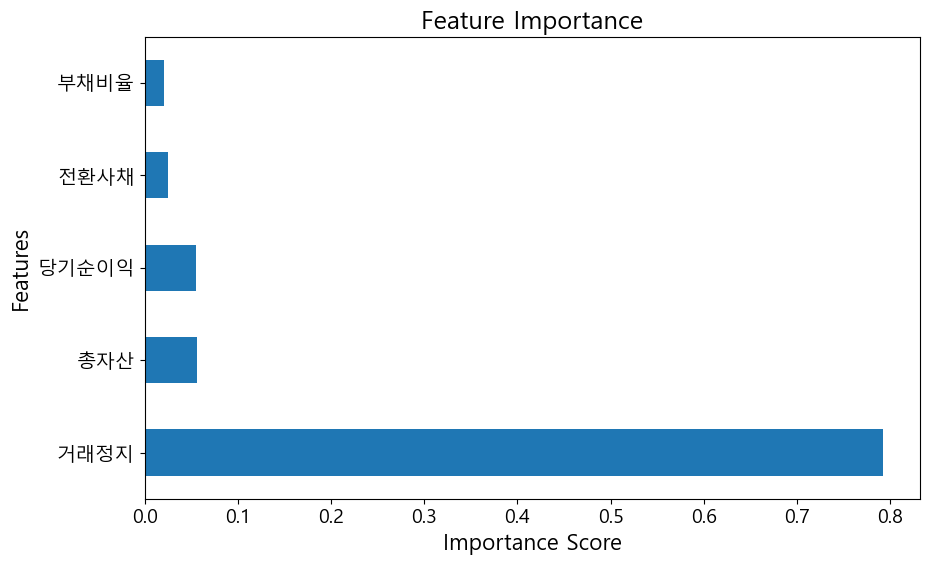

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = 'C:\Windows\Fonts\malgun.ttf'

font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font' , family=font_name)

# Feature Importance 시각화
efn_feat = pd.Series(efn_dt.feature_importances_, index=efn_data.columns)
efn_feat.nlargest(5).plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance', fontsize=18)
plt.xlabel('Importance Score', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.show()

c:\Users\qq\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
C:\Users\qq\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


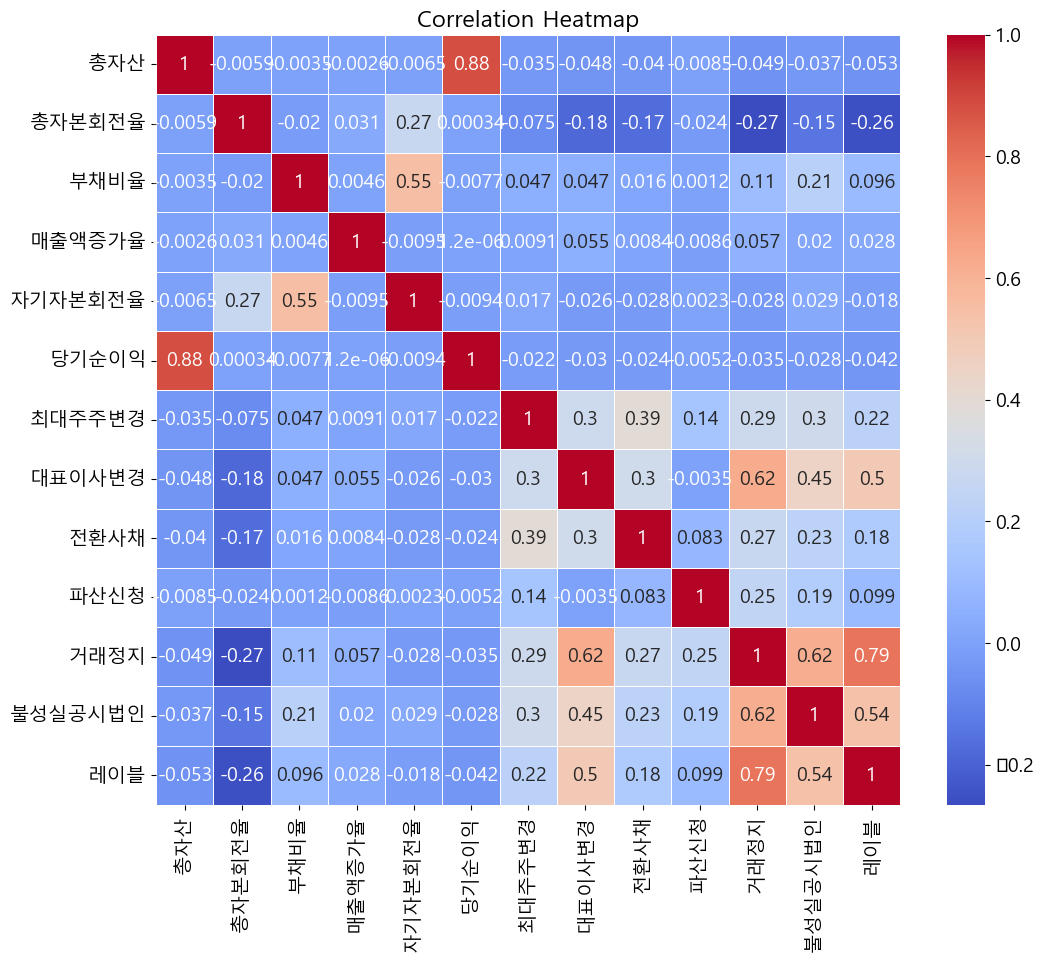

In [37]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = 'C:\Windows\Fonts\malgun.ttf'

font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font' , family=font_name)

# 상관관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(e_financial.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()